In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
startup_df = pd.read_csv(r"C:\Users\kartik singh\Desktop\kaggle data\startup_funding.csv")
startup_df["InvestorsName"].fillna("various",inplace=True)
startup_df.head(20)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
5,5,01/07/2017,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN
6,6,03/07/2017,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN
7,7,04/07/2017,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN
8,8,05/07/2017,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN
9,9,05/07/2017,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN


In [2]:
date=[]
name=[]
vertical=[]
subvertical=[]
city=[]
investors=[]
Type=[]
amount=[]
for j,i in startup_df.iterrows():
    date.append(i["Date"])
    name.append(i["StartupName"])
    vertical.append(i["IndustryVertical"])
    subvertical.append(i["SubVertical"])
    city.append(i["CityLocation"])
    investors.append(i["InvestorsName"])
    Type.append(i["InvestmentType"])
    amount.append(i["AmountInUSD"])

In [3]:
city_unique = np.unique(city)
city_count = []
for i in city_unique:
    city_count.append(city.count(i)) #count of every city in the contribution
city_count_df = pd.DataFrame(city_count, index=city_unique)   


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


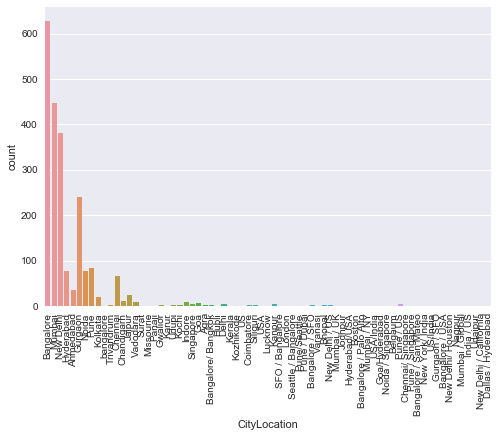

In [4]:
sns.set()
sns.countplot(x="CityLocation", data=startup_df)
plt.xticks(rotation="vertical")
plt.rcParams["figure.figsize"] = [50,60]
plt.show()
#this graph shows which cities are best for finding investments for your company

In [5]:
len(investors)

2372

In [6]:
investors_count=[]
for i in investors:
    investors_count.append(len(i.split(",")))

In [7]:
name_df=pd.DataFrame(name,columns=["name"])
investor_count_df=pd.DataFrame(investors_count,columns=["count"]).astype(np.float32)
data_df = pd.DataFrame()
name_df=name_df.join(investor_count_df)
name_df.head()

,name,count
0,TouchKin,1.0
1,Ethinos,1.0
2,Leverage Edu,7.0
3,Zepo,4.0
4,Click2Clinic,2.0


In [8]:
#sns.set()
#sns.barplot(x="name",y="count", data=name_df)
#plt.xticks(rotation="vertical")
#plt.rcParams["figure.figsize"] = [50,60]
#plt.show()
#trying to figure out number of investors attracted by a company.
#mission failed: 

In [9]:
for j,i in name_df.iterrows():
    if i["count"] == max(name_df["count"]):
        print(i["name"])

Innov8
MyChild App


In [10]:
vertical_df=pd.DataFrame(vertical,columns=["vertical"])
name_df = name_df.join(vertical_df)
name_df.head()

,name,count,vertical
0,TouchKin,1.0,Technology
1,Ethinos,1.0,Technology
2,Leverage Edu,7.0,Consumer Internet
3,Zepo,4.0,Consumer Internet
4,Click2Clinic,2.0,Consumer Internet


In [11]:
vertical_unique = np.unique(vertical)
leading_verticals_investors_count = []
for j,i in name_df.iterrows():
    if i["count"] >6:
        leading_verticals_investors_count.append(i["vertical"])
leading_verticals_investors_count = np.unique(leading_verticals_investors_count) 
len(leading_verticals_investors_count)

21

In [12]:
for i in leading_verticals_investors_count:
    cnt=0
    for j,k in name_df.iterrows():
        if k["vertical"] == i:
            cnt=cnt+k["count"]
    print(cnt,i)        

7.0 Alternate Mobile Monetization platform
1502.0 Consumer Internet
8.0 Crowd funding platform
7.0 Data Science & UX design Learning platform
7.0 Doctor Appointment booking app
111.0 ECommerce
8.0 Easy Business Loans platform
9.0 Ecommerce
43.0 Education
20.0 Finance
7.0 Fund Raising Platform
7.0 Last Minute Hotel Booking App
50.0 Logistics
8.0 Mobile Food Ordering app
7.0 Mobile Growth HackingPlatform
7.0 Online Counselling and psychological support platform
7.0 P2P Payments platform
7.0 Parents & Kids Online platform
582.0 Technology
334.0 eCommerce
0 nan


In [13]:
#from the about data we can see that "Consumer Internet" is the vertical with the most number of investors which means more
#people are interested in this vertical.

In [14]:
CI_fundtype=[]
for j,i in startup_df.iterrows():
    if i["IndustryVertical"] == "Consumer Internet":
        CI_fundtype.append(i["InvestmentType"])

In [15]:
CI_fundtype_unique=np.unique(CI_fundtype)
print(len(CI_fundtype_unique))
for i in CI_fundtype_unique:
    cnt=0
    for j in CI_fundtype:
        if j==i:
            cnt=cnt+1
    print(cnt,i)   
#from the output below we get the info that the most demanding startup industry vertical get most of its funding from SEED FUNDING.    

3
1 Debt Funding
298 Private Equity
473 Seed Funding


In [16]:
tech_fundtype=[]
for j,i in startup_df.iterrows():
    if i["IndustryVertical"] == "Technology":
        tech_fundtype.append(i["InvestmentType"])
tech_fundtype_unique=np.unique(tech_fundtype)
print(len(tech_fundtype_unique))
for i in tech_fundtype_unique:
    cnt=0
    for j in tech_fundtype:
        if j==i:
            cnt=cnt+1
    print(cnt,i)
#below output shows that technology which is second most demanding vertical has most of its funding mainly from Private Equity and Seed Funding.


2
150 Private Equity
163 Seed Funding


In [17]:
EC_fundtype=[]
for j,i in startup_df.iterrows():
    if (i["IndustryVertical"] == "ECommerce") or (i["IndustryVertical"] == "Ecommerce") or (i["IndustryVertical"] == "eCommerce"):
        EC_fundtype.append(i["InvestmentType"])
EC_fundtype_unique=np.unique(EC_fundtype)
print(len(EC_fundtype_unique))
for i in EC_fundtype_unique:
    cnt=0
    for j in EC_fundtype:
        if j==i:
            cnt=cnt+1
    print(cnt,i)   
#below output shows that E-Commerce have their funding mainly of type Private Equity and Seed Funding.    

2
123 Private Equity
104 Seed Funding


In [18]:
def abc(verti):
    a_list = []
    for j,i in startup_df.iterrows():
        if (i["IndustryVertical"] == verti):
            a_list.append((i["InvestmentType"]))
    a_list_unique = np.unique(a_list)
    b_list=[]
    for i in a_list_unique:
        cnt=0
        for j in a_list:
            if j==i:
                cnt=cnt+1
        b_list.append([cnt,i]) 
    return b_list    

In [19]:
city_unique

array(['Agra', 'Ahmedabad', 'Bangalore', 'Bangalore / Palo Alto',
       'Bangalore / SFO', 'Bangalore / San Mateo', 'Bangalore / USA',
       'Bangalore/ Bangkok', 'Belgaum', 'Bhopal', 'Boston', 'Chandigarh',
       'Chennai', 'Chennai/ Singapore', 'Coimbatore',
       'Dallas / Hyderabad', 'Delhi', 'Goa', 'Goa/Hyderabad', 'Gurgaon',
       'Gurgaon / SFO', 'Gwalior', 'Hubli', 'Hyderabad', 'Hyderabad/USA',
       'India / US', 'Indore', 'Jaipur', 'Jodhpur', 'Kanpur', 'Karur',
       'Kerala', 'Kochi', 'Kolkata', 'Kozhikode', 'London', 'Lucknow',
       'Missourie', 'Mumbai', 'Mumbai / Global', 'Mumbai / NY',
       'Mumbai / UK', 'Nagpur', 'New Delhi', 'New Delhi / California',
       'New Delhi / US', 'New Delhi/ Houston', 'New York/ India', 'Noida',
       'Noida / Singapore', 'Panaji', 'Pune', 'Pune / Dubai',
       'Pune / Singapore', 'Pune / US', 'Pune/Seattle', 'SFO / Bangalore',
       'Seattle / Bangalore', 'Siliguri', 'Singapore', 'Surat',
       'Trivandrum', 'US', 'US/India

In [20]:
def city_wise_type_list(city):
    a_list=[]
    b_list = {}
    for j,i in startup_df.iterrows():
        if i["CityLocation"] == city:
            a_list.append(i["InvestmentType"])
    a_list_unique = np.unique(a_list)
    for i in a_list_unique:
        cnt=0
        for j in a_list:
            if i==j:
                cnt=cnt+1
        b_list[i]=cnt 
    return b_list    
city_wise_type_list("Ahmedabad")

{'Debt Funding': 1, 'Private Equity': 11, 'Seed Funding': 23}

In [21]:
type_unique = np.unique(Type)


In [22]:
graph_df = pd.DataFrame(index=city_unique)
graph_df = graph_df.join(pd.DataFrame(columns=type_unique))
len(graph_df)
for key,value in city_wise_type_list("Agra").items():
    graph_df.loc["Agra":"Agra",key:key] = value

In [23]:
for i in city_unique:
    for key,value in city_wise_type_list(i).items():
        graph_df.loc[i:i,key:key] = value

In [24]:
graph_df = graph_df.fillna(0)
#this gives us the info that which city is giving which type of funding 

In [27]:
import math
NaN_amount=[]



TypeError: a float is required

In [ ]:
startup_df.iloc[0,8]